In [156]:
import pandas as pd


In [157]:
phe = pd.read_csv('phe153.csv', index_col=0)
phe.head()

,days_to_bcr,bcr_status
TCGA-2A-A8W3-01,0.108493,0
TCGA-CH-5788-01,0.430685,0
TCGA-EJ-5504-01,0.042192,0
TCGA-EJ-5508-01,1.000000,1
TCGA-EJ-5510-01,1.000000,1


In [158]:
rna = pd.read_csv('rna153.csv', index_col=0)
rna = rna.T
rna.iloc[0:5:,0:3]

,ENSG00000000003,ENSG00000000419,ENSG00000000457
TCGA-2A-A8W3-01,4.866321,4.847948,3.942577
TCGA-CH-5788-01,6.312406,4.654767,4.099412
TCGA-EJ-5504-01,6.533654,4.600528,4.405754
TCGA-EJ-5508-01,6.128060,4.665022,4.872938
TCGA-EJ-5510-01,6.242000,4.519519,4.300672


In [159]:
rna.shape

(153, 15536)

In [160]:
rna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, TCGA-2A-A8W3-01 to TCGA-ZG-A9LZ-01
Columns: 15536 entries, ENSG00000000003 to ENSG00000204296
dtypes: float64(15536)
memory usage: 18.1+ MB


In [161]:
rna.iloc[:,0:6].describe()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.843543,4.681327,4.157550,1.891002,2.139617,4.015591
std,0.569607,0.310580,0.498059,0.496905,0.904835,1.069145
min,2.915246,3.490407,3.043361,0.266642,-0.460337,1.405213
25%,5.515916,4.540176,3.848762,1.542936,1.668871,3.181833
50%,5.860118,4.709836,4.153590,1.916693,2.095957,4.123162
75%,6.193381,4.847948,4.470443,2.213119,2.752876,4.718844
max,7.661269,5.754718,5.477418,3.207159,5.223149,6.639338


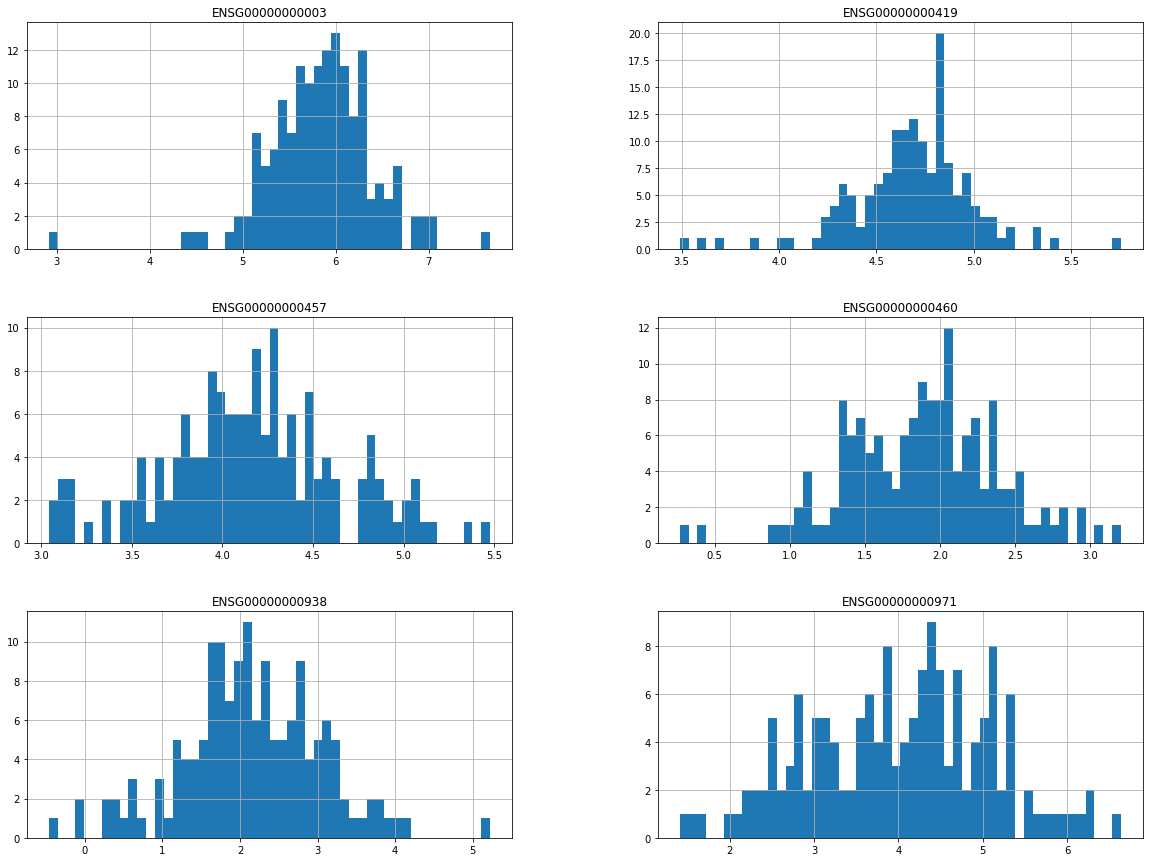

In [162]:
%matplotlib inline

import matplotlib.pyplot as plt

rna.iloc[:,0:6].hist(bins=50, figsize=(20,15))

plt.show()

In [163]:
rna_bcr_corr = abs(rna.corrwith(phe['days_to_bcr']))

In [164]:
rna_bcr_corr_sort = rna_bcr_corr.sort_values(ascending=False)

In [165]:
rna_bcr_corr_sort

ENSG00000165983    0.381159
ENSG00000004777    0.379584
ENSG00000061273    0.368599
ENSG00000138942    0.364709
ENSG00000065665    0.361833
ENSG00000172932    0.352483
ENSG00000076382    0.352387
ENSG00000225855    0.350211
ENSG00000250903    0.345276
ENSG00000169992    0.345274
ENSG00000101224    0.345037
ENSG00000148384    0.344797
ENSG00000133247    0.344294
ENSG00000132016    0.343456
ENSG00000106819    0.342584
ENSG00000254815    0.341131
ENSG00000185267    0.341115
ENSG00000143630    0.339256
ENSG00000149782    0.338304
ENSG00000013810    0.335026
ENSG00000188766    0.333855
ENSG00000255007    0.332315
ENSG00000168056    0.331135
ENSG00000122678    0.330968
ENSG00000168010    0.328510
ENSG00000247796    0.328195
ENSG00000139636    0.327326
ENSG00000204248    0.324566
ENSG00000160741    0.323947
ENSG00000103018    0.323799
                     ...   
ENSG00000187123    0.000209
ENSG00000103091    0.000209
ENSG00000222033    0.000195
ENSG00000109458    0.000177
ENSG00000105738    0

In [166]:
type(rna_bcr_corr)

pandas.core.series.Series

In [167]:
gene1 = rna_bcr_corr_sort.index[0]
gene1

'ENSG00000165983'

In [168]:
x1 = rna[gene1]
y1 = phe['days_to_bcr']

In [169]:
gene2 = rna_bcr_corr_sort.index[-1]
gene2

'ENSG00000160097'

In [170]:
x2 = rna[gene2]
y2 = phe['days_to_bcr']

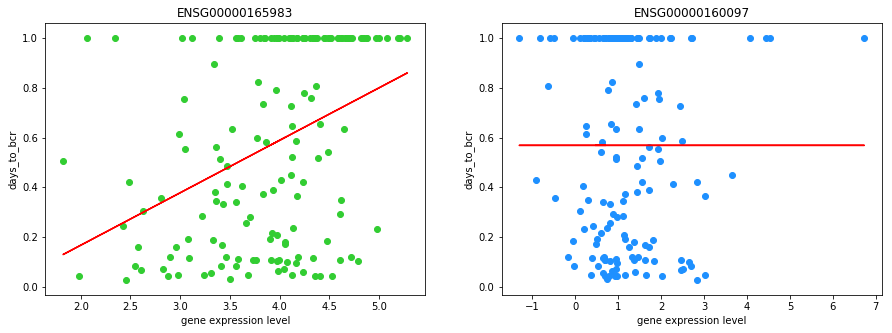

In [171]:
###
import numpy as np

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(x=x1, y=y1, color='limegreen')
plt.title(gene1)
plt.xlabel('gene expression level')
plt.ylabel('days_to_bcr')

z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1), 'b', color='red') # r--


###
plt.subplot(1, 2, 2)
plt.scatter(x=x2, y=y2, color='dodgerblue')
plt.title(gene2)
plt.xlabel('gene expression level')
plt.ylabel('days_to_bcr')


z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2), 'b', color='red')


plt.show()

In [316]:
genes = rna_bcr_corr_sort.index[:100]
genes

Index(['ENSG00000165983', 'ENSG00000004777', 'ENSG00000061273',
       'ENSG00000138942', 'ENSG00000065665', 'ENSG00000172932',
       'ENSG00000076382', 'ENSG00000225855', 'ENSG00000250903',
       'ENSG00000169992', 'ENSG00000101224', 'ENSG00000148384',
       'ENSG00000133247', 'ENSG00000132016', 'ENSG00000106819',
       'ENSG00000254815', 'ENSG00000185267', 'ENSG00000143630',
       'ENSG00000149782', 'ENSG00000013810', 'ENSG00000188766',
       'ENSG00000255007', 'ENSG00000168056', 'ENSG00000122678',
       'ENSG00000168010', 'ENSG00000247796', 'ENSG00000139636',
       'ENSG00000204248', 'ENSG00000160741', 'ENSG00000103018',
       'ENSG00000125780', 'ENSG00000171476', 'ENSG00000162599',
       'ENSG00000071246', 'ENSG00000100522', 'ENSG00000161381',
       'ENSG00000089280', 'ENSG00000149679', 'ENSG00000205707',
       'ENSG00000234771', 'ENSG00000085999', 'ENSG00000133624',
       'ENSG00000166508', 'ENSG00000116171', 'ENSG00000273373',
       'ENSG00000140534', 'ENSG000001813

In [317]:
rna = rna[genes]
rna.shape

(153, 100)

In [318]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
rna_tr = std.fit_transform(rna)

In [319]:
rna_tr

array([[ 0.01020305,  0.9708299 ,  0.99424678, ...,  0.26617201,
         1.36589533,  1.41828813],
       [ 0.16509144, -1.26775352, -1.70105942, ..., -1.38970671,
        -1.29292588, -1.04658608],
       [ 0.8959669 , -1.8928794 , -1.3092475 , ..., -0.01659504,
        -1.37053455, -0.84739215],
       ...,
       [ 0.38807502,  0.54907246,  0.23562237, ...,  0.93137114,
        -0.86273417, -1.51212646],
       [-2.07933034,  0.08908149,  0.66596255, ...,  2.16824567,
        -0.99887383,  0.54076596],
       [ 0.21158967, -0.49137931, -0.64731932, ...,  0.06118857,
         0.79989105,  0.7932385 ]])

In [320]:
ck = (rna.iloc[:,0]-rna.iloc[:,0].mean())/rna.iloc[:,0].std()

In [321]:
ck[:10]

TCGA-2A-A8W3-01    0.010170
TCGA-CH-5788-01    0.164551
TCGA-EJ-5504-01    0.893034
TCGA-EJ-5508-01    0.978702
TCGA-EJ-5510-01    0.471765
TCGA-EJ-5514-01    1.152784
TCGA-EJ-5515-01    1.330449
TCGA-EJ-5516-01    1.973138
TCGA-EJ-5517-01    1.528431
TCGA-EJ-5518-01   -2.223292
Name: ENSG00000165983, dtype: float64

In [322]:
days_to_bcr = phe['days_to_bcr'].copy()
days_to_bcr

TCGA-2A-A8W3-01    0.108493
TCGA-CH-5788-01    0.430685
TCGA-EJ-5504-01    0.042192
TCGA-EJ-5508-01    1.000000
TCGA-EJ-5510-01    1.000000
TCGA-EJ-5514-01    1.000000
TCGA-EJ-5515-01    1.000000
TCGA-EJ-5516-01    1.000000
TCGA-EJ-5517-01    1.000000
TCGA-EJ-5518-01    1.000000
TCGA-EJ-5519-01    0.046027
TCGA-EJ-5521-01    1.000000
TCGA-EJ-5522-01    1.000000
TCGA-EJ-5524-01    0.632877
TCGA-EJ-5525-01    0.185205
TCGA-EJ-5526-01    0.294247
TCGA-EJ-5530-01    1.000000
TCGA-EJ-5532-01    1.000000
TCGA-EJ-7115-01    1.000000
TCGA-EJ-7123-01    1.000000
TCGA-EJ-7125-01    1.000000
TCGA-EJ-7218-01    1.000000
TCGA-EJ-7318-01    0.103562
TCGA-EJ-7331-01    0.103562
TCGA-EJ-7783-01    0.044384
TCGA-EJ-8468-01    1.000000
TCGA-EJ-8469-01    1.000000
TCGA-EJ-8472-01    0.107397
TCGA-EJ-A46F-01    0.117808
TCGA-EJ-A65F-01    0.041096
                     ...   
TCGA-VP-A878-01    0.053699
TCGA-VP-A87B-01    1.000000
TCGA-VP-A87D-01    0.654247
TCGA-VP-A87E-01    1.000000
TCGA-VP-A87K-01    0

In [323]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return (data.iloc[train_indices], data.iloc[test_indices])

In [324]:
test_ratio = 1/3
n_instances = len(rna)


shuffled_indices = np.random.permutation(n_instances)
test_set_size = int(n_instances*test_ratio)

In [325]:
test_set_size

51

In [326]:
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

In [327]:
train_rna = rna.iloc[train_indices]
test_rna = rna.iloc[test_indices]

In [328]:
train_rna.shape

(102, 100)

In [329]:
train_phe = phe.iloc[train_indices]
test_phe = phe.iloc[test_indices]

In [330]:
train_phe

,days_to_bcr,bcr_status
TCGA-KC-A4BL-01,0.105753,0
TCGA-X4-A8KQ-01,0.483836,0
TCGA-VP-A876-01,1.000000,1
TCGA-VP-A87D-01,0.654247,0
TCGA-G9-6336-01,1.000000,1
TCGA-KK-A7B2-01,0.379178,0
TCGA-QU-A6IP-01,1.000000,1
TCGA-KC-A4BV-01,0.727671,0
TCGA-QU-A6IN-01,1.000000,1
TCGA-EJ-5515-01,1.000000,1


In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#reg = LinearRegression()
reg1 = Ridge()
reg2 = Lasso()
reg3 = ElasticNet()

reg4 = DecisionTreeRegressor()
reg5 = RandomForestRegressor()

reg6 = SVR(kernel='linear')
reg7 = SVR(kernel='poly')
reg8 = SVR(kernel='rbf')


for reg in [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8]:
    reg.fit(train_rna, train_phe['days_to_bcr'])


#reg1.fit(train_rna, train_phe['days_to_bcr'])
#reg2.fit(train_rna, train_phe['days_to_bcr'])
#reg3.fit(train_rna, train_phe['days_to_bcr'])
#reg4.fit(train_rna, train_phe['days_to_bcr'])
#reg5.fit(train_rna, train_phe['days_to_bcr'])
#reg6.fit(train_rna, train_phe['days_to_bcr'])
#reg7.fit(train_rna, train_phe['days_to_bcr'])
#reg8.fit(train_rna, train_phe['days_to_bcr'])





In [332]:
pred1 = reg1.predict(test_rna)
pred2 = reg2.predict(test_rna)
pred3 = reg3.predict(test_rna)
pred4 = reg4.predict(test_rna)

pred5 = reg5.predict(test_rna)
pred6 = reg6.predict(test_rna)
pred7 = reg7.predict(test_rna)
pred8 = reg8.predict(test_rna)

In [333]:
pred1

array([ 0.99058911,  1.12165375,  0.09899414,  0.51432855,  0.58769089,
       -0.027251  ,  0.94157058,  0.03927087,  0.6325519 ,  0.58437173,
        1.10250338,  0.78804681,  0.57599987,  0.52207371,  0.33756572,
       -0.00172621,  0.05110617,  1.10106782,  0.04383257, -0.19116659,
        0.57011828,  0.17060315, -0.28446223,  0.77028147,  0.33057797,
        0.73514883,  1.06319258,  1.37711943,  1.13191578,  1.24486631,
        0.43937495,  1.47743576,  0.26574167,  0.84923311,  0.74067542,
        0.86850723,  0.67705893,  0.95064178, -0.10108246,  0.82113148,
        0.61574772,  0.37980401,  0.81337798,  0.55695675, -0.18525325,
        1.27328452,  0.50329362,  0.47322765,  0.33896495,  0.27201657,
        0.54285626])

In [334]:
pred2

array([0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082, 0.53965082, 0.53965082, 0.53965082, 0.53965082,
       0.53965082])

In [335]:
cor = []

for y in [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8]:
    cor.append(round(np.corrcoef(x=x, y=y)[0][1],3))
    
print (cor)

[-0.023, nan, nan, -0.169, -0.186, 0.006, -0.068, -0.159]


/home/ruidong/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ruidong/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [336]:
cor = list(map(str, cor))
cor

['-0.023', 'nan', 'nan', '-0.169', '-0.186', '0.006', '-0.068', '-0.159']

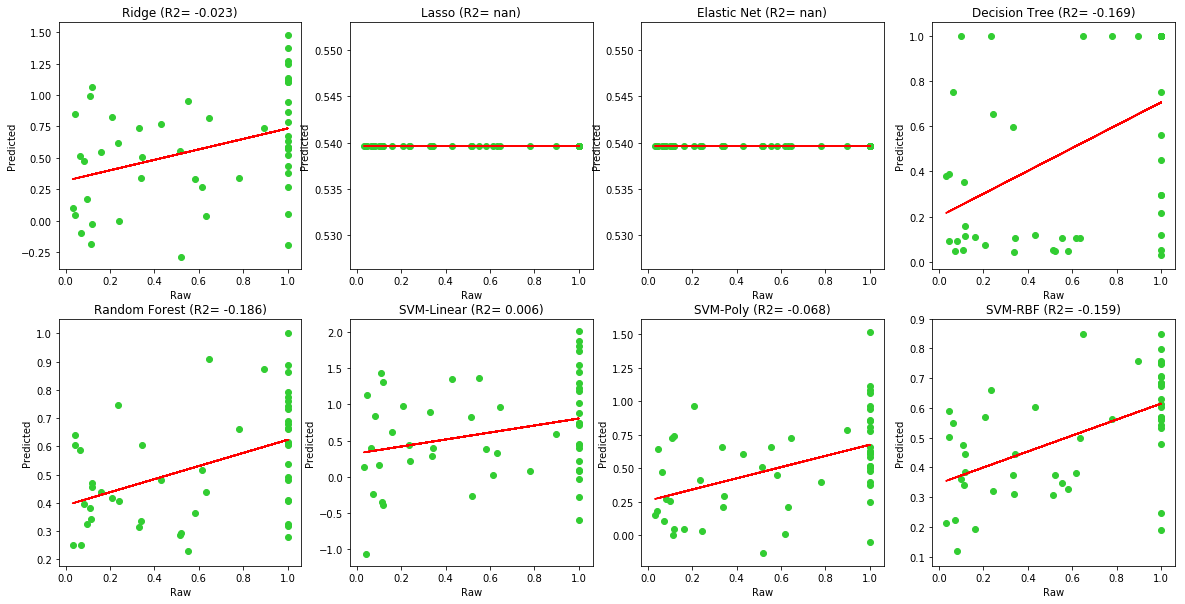

In [337]:

x = test_phe['days_to_bcr']

plt.figure(figsize=(20,10))

###
plt.subplot(2, 4, 1)
plt.scatter(x=x, y=pred1, color='limegreen')
plt.title('Ridge' + ' (R2= ' + cor[0] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred1, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--

###
plt.subplot(2, 4, 2)
plt.scatter(x=x, y=pred2, color='limegreen')
plt.title('Lasso' + ' (R2= ' + cor[1] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred2, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 3)
plt.scatter(x=x, y=pred3, color='limegreen')
plt.title('Elastic Net' + ' (R2= ' + cor[2] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred3, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 4)
plt.scatter(x=x, y=pred4, color='limegreen')
plt.title('Decision Tree' + ' (R2= ' + cor[3] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred4, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 5)
plt.scatter(x=x, y=pred5, color='limegreen')
plt.title('Random Forest' + ' (R2= ' + cor[4] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred5, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 6)
plt.scatter(x=x, y=pred6, color='limegreen')
plt.title('SVM-Linear' + ' (R2= ' + cor[5] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred6, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 7)
plt.scatter(x=x, y=pred7, color='limegreen')
plt.title('SVM-Poly' + ' (R2= ' + cor[6] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred7, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--



###
plt.subplot(2, 4, 8)
plt.scatter(x=x, y=pred8, color='limegreen')
plt.title('SVM-RBF' + ' (R2= ' + cor[7] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred8, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--



In [ ]:
********************************************************************************************************

In [338]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=36)

clf.fit(train_rna, train_phe['bcr_status'])

/home/ruidong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=36, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [339]:
clf.predict(test_rna)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [340]:
test_phe['bcr_status'].values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0])

In [341]:
y_scores = clf.decision_function(test_rna)
y_scores

array([ -4168.76431541,   1735.30507972,  -6608.70963006,  -2748.15786254,
        -4391.6120146 ,  -3072.84394648,   2942.74007006,  -2431.85168727,
         1613.68958206,   3540.12047581,   2957.57082834,   6944.95693698,
          317.94568635,   4783.91817245,   1240.94747413,  -1982.11631195,
         1984.45605512,   4940.57257742,  -2444.52767455,  -6518.73108567,
         2110.55225612,  -2170.58358542,  -4926.8654381 ,   1689.78356621,
        -5154.8258624 ,   2753.79410105,  -8992.82637175,  -1044.46144387,
         2862.70193009,  12371.97007456,   1865.01444102,  10259.07391798,
        -1777.19575521,  -2711.31564535,  -2818.79265097,  -1077.51782563,
        -2691.32360758,  -4913.45959015,  -5653.73173798,  -7509.00234626,
          340.58265787,   6815.76665755,   6641.04137255,  -4932.86510064,
        -7017.97161476,   -698.18375609,   -646.11826119,  -8895.44264403,
        -6002.22551924,  -5556.38048148, -10294.76541289])

In [342]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_phe['bcr_status'], y_scores)

from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(test_phe['bcr_status'], y_scores),3)
auc

0.831

In [343]:
fpr

array([0.        , 0.        , 0.03571429, 0.03571429, 0.07142857,
       0.07142857, 0.10714286, 0.10714286, 0.17857143, 0.17857143,
       0.21428571, 0.21428571, 0.39285714, 0.39285714, 0.57142857,
       0.57142857, 0.71428571, 0.71428571, 0.78571429, 0.78571429,
       1.        ])

In [344]:
tpr

array([0.04347826, 0.17391304, 0.17391304, 0.43478261, 0.43478261,
       0.60869565, 0.60869565, 0.65217391, 0.65217391, 0.69565217,
       0.69565217, 0.82608696, 0.82608696, 0.86956522, 0.86956522,
       0.91304348, 0.91304348, 0.95652174, 0.95652174, 1.        ,
       1.        ])

In [345]:
thresholds

array([ 12371.97007456,   6815.76665755,   6641.04137255,   2862.70193009,
         2753.79410105,   1735.30507972,   1689.78356621,   1613.68958206,
          340.58265787,    317.94568635,   -646.11826119,  -1077.51782563,
        -2444.52767455,  -2691.32360758,  -4168.76431541,  -4391.6120146 ,
        -5154.8258624 ,  -5556.38048148,  -6002.22551924,  -6518.73108567,
       -10294.76541289])

In [356]:
def plot_roc_curve(fpr, tpr, label=None, title=None):
    plt.plot(fpr, tpr, linewidth=2, label=label, color='red')
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(title)

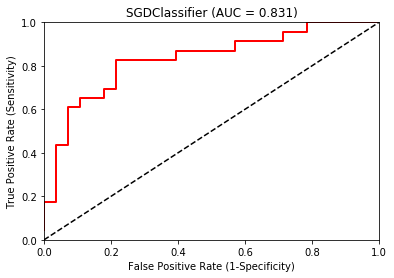

In [357]:
plot_roc_curve(fpr, tpr, title='SGDClassifier (AUC = ' + str(auc) + ')')
plt.show()

In [348]:
from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#reg = LinearRegression()
reg1 = SGDClassifier(random_state=36)
reg2 = LogisticRegression()
reg3 = KNeighborsClassifier()

reg4 = DecisionTreeClassifier()
reg5 = RandomForestClassifier()

reg6 = SVC(kernel='linear')
reg7 = SVC(kernel='poly')
reg8 = SVC(kernel='rbf')


for reg in [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8]:
    reg.fit(train_rna, train_phe['bcr_status'])


#reg1.fit(train_rna, train_phe['days_to_bcr'])
#reg2.fit(train_rna, train_phe['days_to_bcr'])
#reg3.fit(train_rna, train_phe['days_to_bcr'])
#reg4.fit(train_rna, train_phe['days_to_bcr'])
#reg5.fit(train_rna, train_phe['days_to_bcr'])
#reg6.fit(train_rna, train_phe['days_to_bcr'])
#reg7.fit(train_rna, train_phe['days_to_bcr'])
#reg8.fit(train_rna, train_phe['days_to_bcr'])

/home/ruidong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [349]:
pred1 = reg1.predict(test_rna)
pred2 = reg2.predict(test_rna)
pred3 = reg3.predict(test_rna)
pred4 = reg4.predict(test_rna)

pred5 = reg5.predict(test_rna)
pred6 = reg6.predict(test_rna)
pred7 = reg7.predict(test_rna)
pred8 = reg8.predict(test_rna)

In [350]:
pred8

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [351]:
test_phe['bcr_status'].values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0])

In [352]:
y_scores1 = reg1.decision_function(test_rna)
y_scores2 = reg2.decision_function(test_rna)

y_scores3 = reg3.predict_proba(test_rna)
y_scores3 = y_scores3[:,1]

y_scores4 = reg4.predict_proba(test_rna)
y_scores4 = y_scores4[:,1]

y_scores5 = reg5.predict_proba(test_rna)
y_scores5 = y_scores5[:,1]

y_scores6 = reg6.decision_function(test_rna)

y_scores7 = reg7.decision_function(test_rna)
y_scores8 = reg8.decision_function(test_rna)


In [353]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(test_phe['bcr_status'], y_scores1)
fpr2, tpr2, thresholds2 = roc_curve(test_phe['bcr_status'], y_scores2)

fpr3, tpr3, thresholds3 = roc_curve(test_phe['bcr_status'], y_scores3)
fpr4, tpr4, thresholds4 = roc_curve(test_phe['bcr_status'], y_scores4)
fpr5, tpr5, thresholds5 = roc_curve(test_phe['bcr_status'], y_scores5)

fpr6, tpr6, thresholds6 = roc_curve(test_phe['bcr_status'], y_scores6)
fpr7, tpr7, thresholds7 = roc_curve(test_phe['bcr_status'], y_scores7)
fpr8, tpr8, thresholds8 = roc_curve(test_phe['bcr_status'], y_scores8)


from sklearn.metrics import roc_auc_score
auc1 = round(roc_auc_score(test_phe['bcr_status'], y_scores1),3)
auc2 = round(roc_auc_score(test_phe['bcr_status'], y_scores2),3)

auc3 = round(roc_auc_score(test_phe['bcr_status'], y_scores3),3)
auc4 = round(roc_auc_score(test_phe['bcr_status'], y_scores4),3)
auc5 = round(roc_auc_score(test_phe['bcr_status'], y_scores5),3)

auc6 = round(roc_auc_score(test_phe['bcr_status'], y_scores6),3)
auc7 = round(roc_auc_score(test_phe['bcr_status'], y_scores7),3)
auc8 = round(roc_auc_score(test_phe['bcr_status'], y_scores8),3)

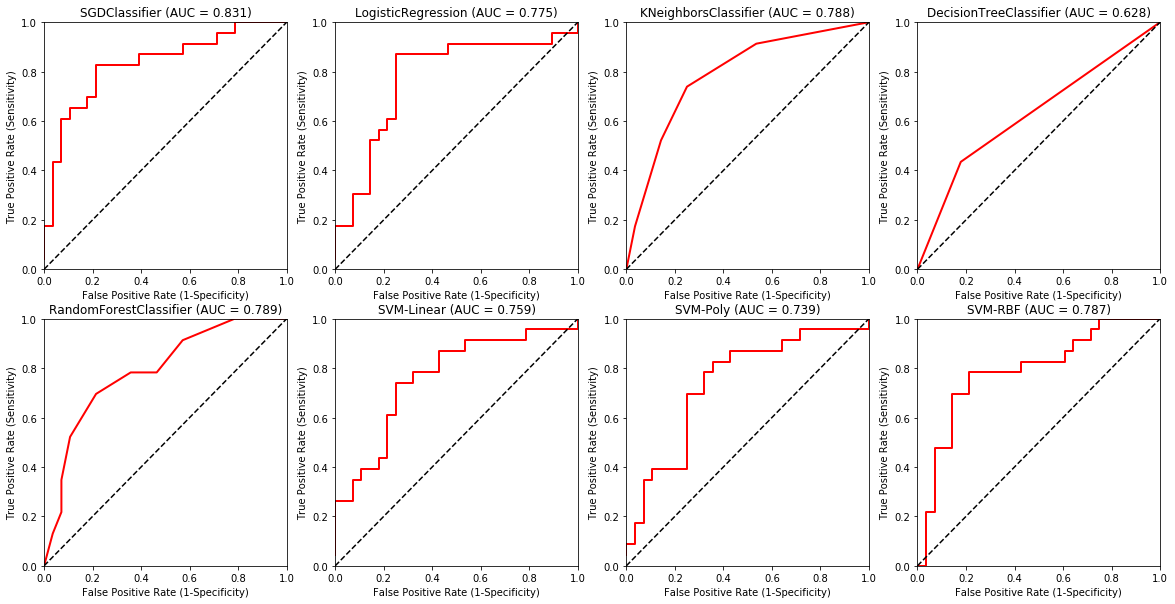

In [358]:

plt.figure(figsize=(20,10))

###
plt.subplot(2, 4, 1)
plot_roc_curve(fpr1, tpr1, title='SGDClassifier (AUC = ' + str(auc1) + ')')

plt.subplot(2, 4, 2)
plot_roc_curve(fpr2, tpr2, title='LogisticRegression (AUC = ' + str(auc2) + ')')

plt.subplot(2, 4, 3)
plot_roc_curve(fpr3, tpr3, title='KNeighborsClassifier (AUC = ' + str(auc3) + ')')

plt.subplot(2, 4, 4)
plot_roc_curve(fpr4, tpr4, title='DecisionTreeClassifier (AUC = ' + str(auc4) + ')')

plt.subplot(2, 4, 5)
plot_roc_curve(fpr5, tpr5, title='RandomForestClassifier (AUC = ' + str(auc5) + ')')

plt.subplot(2, 4, 6)
plot_roc_curve(fpr6, tpr6, title='SVM-Linear (AUC = ' + str(auc6) + ')')

plt.subplot(2, 4, 7)
plot_roc_curve(fpr7, tpr7, title='SVM-Poly (AUC = ' + str(auc7) + ')')

plt.subplot(2, 4, 8)
plot_roc_curve(fpr8, tpr8, title='SVM-RBF (AUC = ' + str(auc8) + ')')


plt.show()
